<p align="left">
  <img src="Images/image1.png" alt="example">
</p>

<font size="6"><b>Evaluating & Forecasting Property Prices Through Modelling</b></font>


<b>Author:</b> <font size="2">Warren Morelli
    <br>


<p style="margin: 10px 0;"></p>

<font size="3"><b>Overview:</b></font>


<font size="3">I am tasked to help a Real Estate Buyer's Agency in seeking to identify key property features, such as square footage and number of rooms, to identify undervalued properties that can be presented as investment opportunities for clients.</font>

<p style="margin: 10px 0;"></p>

<font size="3"><b>Data:</b></font>


<font size="3">The data utilized in this project was sourced from the kc_house_data CSV file. The data set is comprised of 21,597 rows and 21 columns, providing an ample amount of information for modeling purposes. This comprehensive data set is well-suited to support the modeling process and can be expected to yield reliable results.</font>

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("data/kc_house_data.csv")
df = pd.read_csv("data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<p style="margin: 10px 0;"></p>

<font msize="3"><b>Inspect data:</b></font>

<font size="3">Upon conducting an initial review of the data, it was observed that there were a limited number of missing values present. Additionally, there were several instances where the data types differed, requiring appropriate addressing to ensure a cohesive and accurate analysis. These findings emphasize the importance of thorough data inspection and proper data preparation, which are critical steps in the modeling process.</font>

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<p style="margin: 10px 0;"></p>

<font msize="3"><b>Clean Data:</b></font>

<font size="3">To prepare the data for modeling, I first assessed and eliminated null values deemed to have no impact on the price of real estate. I then dropped all remaining null values, as they represented a minor portion of the total data. To ensure a seamless modeling process, I converted the data to integer format, standardizing it and avoiding potential modeling issues. These actions guarantee the quality of the data used and the accuracy of the modeling results. </font>

In [3]:
#Drop the values I don't want
data.drop('date', inplace=True, axis=1)
data.drop('zipcode', inplace=True, axis=1)
data.drop('lat', inplace=True, axis=1)
data.drop('id', inplace=True, axis=1)
data.drop('long', inplace=True, axis=1)
data.drop('yr_renovated', inplace=True, axis=1)
data.drop('sqft_basement', inplace=True, axis=1)
data.drop('sqft_living15', inplace=True, axis=1)
data.drop('sqft_lot15', inplace=True, axis=1)

In [4]:
#Drop all Null 
data = data.dropna()

In [5]:
#Change data to int to avoid later issues 
data['floors'] = data['floors'].astype(int)
data['bathrooms'] = data['bathrooms'].astype(int)
data['waterfront'] = data['waterfront'].astype(int)
data['view'] = data['view'].astype(int)

<p style="margin: 10px 0;"></p>

<font msize="3"><b>Check for outliers:</b></font>

<font size="3">I conducted a thorough analysis of the data for outliers that could pose challenges during modeling. In doing so, I discovered extreme outliers in the Bedrooms and Square Foot Lot variables, which I determined would be best to remove to maintain the quality of the data and achieve accurate modeling results. </font>

In [6]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built
count,1.916400e+04,19164.000000,19164.000000,19164.000000,1.916400e+04,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000
mean,5.414490e+05,3.374452,1.750887,2082.038301,1.506174e+04,1.447558,0.007566,0.231058,3.409987,7.660718,1791.425433,1971.039553
std,3.709009e+05,0.928676,0.734304,921.918226,4.077215e+04,0.552154,0.086657,0.763368,0.650456,1.175601,831.776073,29.388020
min,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000
25%,3.220000e+05,3.000000,1.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1951.000000
50%,4.500000e+05,3.000000,2.000000,1920.000000,7.620000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000
75%,6.439625e+05,4.000000,2.000000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2217.750000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000


In [7]:
#Bedroom looks strange. Check for outliers.
data['bedrooms'].unique()

#locate outlier
data.loc[data['bedrooms'] > 11]

#Delete Bedroom outlier
data = data.drop([15856])

In [8]:
#sqft_lot has 2 large outlier as well. Drop them.
top_2 = data['sqft_lot'].nlargest(8)
data = data[~data.isin(top_2)].dropna()

<p style="margin: 10px 0;"></p>

<font msize="3"><b>Convert variables</b></font>

<font size="3">The data field for "Year Built" was modified to "Years Old" for improved analysis: </font>

In [9]:
#change 'Year built' to 'Years old' 
data['yrs_old'] = data['yr_built'].apply(lambda x: 2016 - x)
data.drop('yr_built', inplace=True, axis=1)

<p style="margin: 10px 0;"></p>

<font msize="3"><b>Multicollinearity</b></font>

<font size="3">I searched for multicollinearity that could potentially compromise the accuracy of my Ordinary Least Squares (OLS) modeling results. I made sure to strike a balance between addressing the issue and preserving a sufficient sample size, as the removal of too much data could negatively impact the predictive power of my model.</font>

In [10]:
data_mc = data.drop('price', axis=1)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
VIF['feature'] = data_mc.columns
VIF['VIF'] = [variance_inflation_factor(data_mc.values, i) for i in range(data_mc.shape[1])]

VIF

,feature,VIF
0,bedrooms,22.291630
1,bathrooms,16.047928
2,sqft_living,43.349882
3,sqft_lot,1.261822
4,floors,15.195701
5,waterfront,1.211576
6,view,1.485939
7,condition,27.418292
8,grade,57.610471
9,sqft_above,33.864870


In [12]:
#drop the chosen predictors 
data.drop('grade', inplace=True, axis=1)
data.drop('condition', inplace=True, axis=1)
data.drop('view', inplace=True, axis=1)

In [13]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,yrs_old
1,538000.0,3,2,2570,7242.0,2,0,2170,65
2,180000.0,2,1,770,10000.0,1,0,770,83
3,604000.0,4,3,1960,5000.0,1,0,1050,51
4,510000.0,3,2,1680,8080.0,1,0,1680,29
5,1230000.0,4,4,5420,101930.0,1,0,3890,15


<p style="margin: 10px 0;"></p>

<font msize="3"><b>Dealing with Categorical values</b></font>

<font size="3">I divided the 'bedrooms' and 'bathrooms' variables into smaller sub-groups to mitigate the risk of a "dummy variable trap," which can occur when there are too many categorical predictors. Additionally, I omitted the first category to eliminate any potential issues with multicollinearity.</font>

In [14]:
#Change Bedroom into 3 sections. 1-3 bedrooms, 4-7bedrooms and 7+ bedrooms
data['1-3_bedrooms'] = data['bedrooms'].apply(lambda x: True if x <= 3 else False)
data['1-3_bedrooms'] = data['1-3_bedrooms'].astype(int)

data['4-7_bedrooms'] = data['bedrooms'].apply(lambda x: True if x <= 6 and x > 3 else False)
data['4-7_bedrooms'] = data['4-7_bedrooms'].astype(int)

data['7+_bedrooms'] = data['bedrooms'].apply(lambda x: True if x >= 7 else False)
data['7+_bedrooms'] = data['7+_bedrooms'].astype(int)

#drop 1 to reduce multicollinarity
data.drop('1-3_bedrooms', inplace=True, axis=1)
data.drop('bedrooms', inplace=True, axis=1)

In [15]:
#Change bathrooms into 2 sections. 1-3 bathrooms and 3+ bathrooms 
data['1-3_bathrooms'] = data['bathrooms'].apply(lambda x: True if x <= 3 else False)
data['1-3_bathrooms'] = data['1-3_bathrooms'].astype(int)

data['4+_bathrooms'] = data['bathrooms'].apply(lambda x: True if x >= 4 else False)
data['4+_bathrooms'] = data['4+_bathrooms'].astype(int)

#drop 1 to reduce multicollinarity
data.drop('1-3_bathrooms', inplace=True, axis=1)
data.drop('bathrooms', inplace=True, axis=1)

In [16]:
data.head()

,price,sqft_living,sqft_lot,floors,waterfront,sqft_above,yrs_old,4-7_bedrooms,7+_bedrooms,4+_bathrooms
1,538000.0,2570,7242.0,2,0,2170,65,0,0,0
2,180000.0,770,10000.0,1,0,770,83,0,0,0
3,604000.0,1960,5000.0,1,0,1050,51,1,0,0
4,510000.0,1680,8080.0,1,0,1680,29,0,0,0
5,1230000.0,5420,101930.0,1,0,3890,15,1,0,1


<p style="margin: 10px 0;"></p>

<font msize="3"><b>One Hot Encode (OHE)</b></font>

<font size="3">I utilized One-Hot Encoding (OHE) to generate dummy variables from the remaining categorical predictors.</font>

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

categoricals = ['floors', 'waterfront'] 
continuous = ['price', 'sqft_living', 'sqft_above',  'sqft_lot', 'yrs_old', '4-7_bedrooms', '7+_bedrooms', '4+_bathrooms']

data_ohe = pd.get_dummies(data[categoricals], columns=['floors', 'waterfront'], drop_first=True)
data_ohe

,floors_2,floors_3,waterfront_1
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
...,...,...,...
21591,1,0,0
21592,0,1,0
21593,1,0,0
21594,1,0,0


<p style="margin: 10px 0;"></p>

<font msize="3"><b>Join dummies and continuous data</b></font>

In [18]:
continuous = data[continuous]
preprocessed = pd.concat([continuous, data_ohe], axis=1)

#reduce the number of dummies a bit further
preprocessed.drop('floors_3', inplace=True, axis=1)

preprocessed.head()

,price,sqft_living,sqft_above,sqft_lot,yrs_old,4-7_bedrooms,7+_bedrooms,4+_bathrooms,floors_2,waterfront_1
1,538000.0,2570,2170,7242.0,65,0,0,0,1,0
2,180000.0,770,770,10000.0,83,0,0,0,0,0
3,604000.0,1960,1050,5000.0,51,1,0,0,0,0
4,510000.0,1680,1680,8080.0,29,0,0,0,0,0
5,1230000.0,5420,3890,101930.0,15,1,0,1,0,0


<p style="margin: 10px 0;"></p>

<font msize="3"><b>Stepwise Selection</b></font>

<font size="3">I used stepwise selection to select best fits Vaiables with p-values. I realised this actually selected all of the values, so it was just an indicator that I chose suitable variables from the beginning</font>

In [19]:
#create fuction to use stepwise selection to select best fits with p-values

import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [20]:
X = data['price'].astype(int)
y = preprocessed

#result = stepwise_selection(y, X, verbose=True)

<p style="margin: 10px 0;"></p>

<font msize="3"><b>Feature Ranking</b></font>

<font size="3">I wanted to use feature ranking to select the top 8 best fit variables. This issue was, feature ranking would select all of the categorical variables and wanted to drop continous variables. This could have been an issue when it came to predictive modelling so I decided to keep all of the variables. </font>

In [21]:
preprocessed.drop('price', inplace=True, axis=1)

In [22]:
#from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

predictors = preprocessed

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=9)
selector = selector.fit(predictors, data['price'].values.ravel())

In [23]:
selector.support_ 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [24]:
#turn this back into a dataframe

# Get the indices of the selected features
selected_indices = [i for i, x in enumerate(selector.support_) if x]

# Get the names of the selected features
selected_features = predictors.columns[selected_indices]

# Create a new dataframe using only the selected features
predictors = predictors[selected_features]

In [25]:
predictors.head()

,sqft_living,sqft_above,sqft_lot,yrs_old,4-7_bedrooms,7+_bedrooms,4+_bathrooms,floors_2,waterfront_1
1,2570,2170,7242.0,65,0,0,0,1,0
2,770,770,10000.0,83,0,0,0,0,0
3,1960,1050,5000.0,51,1,0,0,0,0
4,1680,1680,8080.0,29,0,0,0,0,0
5,5420,3890,101930.0,15,1,0,1,0,0


<p style="margin: 10px 0;"></p>

<font msize="3"><b>Split data into Traning & Testing perform Cross-Validation</b></font>

<font size="3">I split the data 70/30 into training and testing which allowed me to test the model to ensure it has the potential to make accurate predictions</font>

In [26]:
from sklearn.model_selection import train_test_split

X = predictors
y = data['price']

#split the data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=59, test_size=0.30)

In [27]:
#check lengths
print(len(X_train), len(X_test), len(y_train), len(y_test))

13408 5747 13408 5747


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

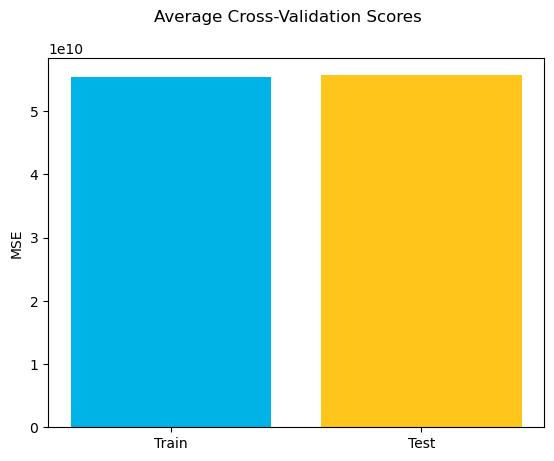

In [29]:
#perform Cross Validation for better accuracy
cross_val_results = cross_validate(linreg, X_train, y_train, scoring="neg_mean_squared_error", return_train_score=True)
# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()

#Create bar graph to compare the MSE with a visual
colors = ["#00B3E6", "#FFC51B"]
labels = ["Train", "Test"]
fig, ax = plt.subplots()
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("MSE")
fig.suptitle("Average Cross-Validation Scores");

In [30]:
#Cross Validation MSE
print('Cross Validation Test Mean Squared Error:', test_avg)
print('Cross Validation Train Mean Squared Error:', train_avg)

Cross Validation Test Mean Squared Error: 55696111872.462234
Cross Validation Train Mean Squared Error: 55440984242.84688


In [31]:
#Fit a linear regression model and calculate MSE for test and train
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [32]:
#calculate the MSE
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 55466559983.2784
Test Mean Squared Error: 60458141545.832214


<p style="margin: 10px 0;"></p>

<font msize="3"><b>Check OLS Regression Results</b></font>

<font size="3">I checked the Ordinary Least Squares (OLS) Regression Results, I aimed to assess the performance of my model and determine if any further iterations were necessary for optimal results.font>

In [33]:
import statsmodels.api as sm
#X_train X_test y_train y_test 

In [34]:
# View OLS Model
X_train_with_intercept = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2180.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:42:53   Log-Likelihood:            -1.8488e+05
No. Observations:               13408   AIC:                         3.698e+05
Df Residuals:                   13398   BIC:                         3.698e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -1.86e+05   7839.416    -23.722      0.000   -2.01e+05   -1.71e+05
sqft_living    278.9922      5.126     54.430      0.000     268.945     289.039
sqft_above      34.7697      5.966      5.828      0.000      23.076      46.463
sqft_lot        -0.6202      0.061    -10.240      0.000      -0.739      -0.502
yrs_old       2445.7254     82.797     29.539      0.000    2283.432    2608.019
4-7_bedrooms -7.937e+04   4955.672    -16.016      0.000   -8.91e+04   -6.97e+04
7+_bedrooms  -2.786e+05   3.88e+04     -7.179      0.000   -3.55e+05   -2.02e+05
4+_bathrooms  3.374e+05   1.64e+04     20.542      0.000    3.05e+05     3.7e+05
floors_2      1.061e+04   5724.408      1.854      0.064    -608.636    2.18e+04
waterfront_1  7.355e+05   2.38e+04     30.864      0.000    6.89e+05    7.82e+05
==============================================================================
Omnibus:                     6466.738   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142209.105
Skew:                           1.816   Prob(JB):                         0.00
Kurtosis:                      18.536   Cond. No.                     7.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

.



<font size="7">ITERATION 2</font>

<p style="margin: 10px 0;"></p>

<font msize="3"><b>Drop Variables</b></font>

<font size="3">After inspecing the OLS results, I notice the 'floors' predictor had a P-value > 0.05 so I decided to drop it.</font>

In [35]:
#drop floors_2
X_train.drop('floors_2', inplace=True, axis=1)
X_test.drop('floors_2', inplace=True, axis=1)

<p style="margin: 10px 0;"></p>

<font msize="3"><b>Check for skewness</b></font>

<font size="3">I used a histogram and Q-Q plot as visuals to check for skewness in my variables</font>

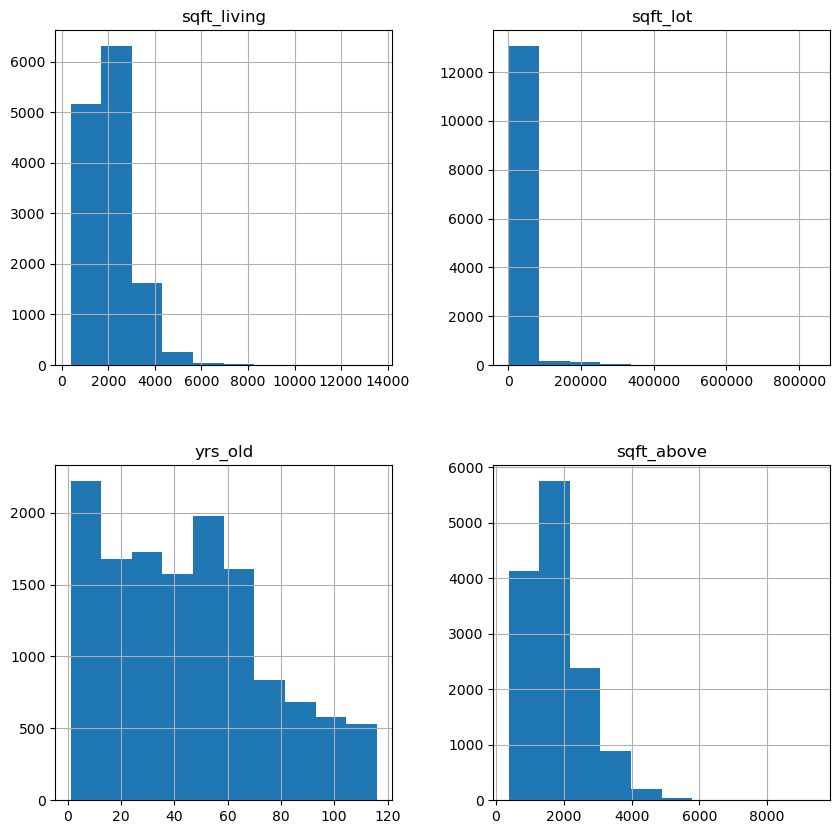

In [37]:
#check for skewness with Hist
cont = ['sqft_living', 'sqft_lot', 'yrs_old', 'sqft_above']
X_train[cont].hist(figsize = [10, 10]);

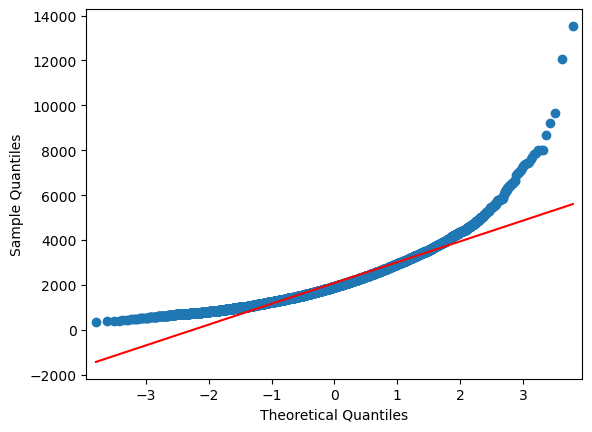

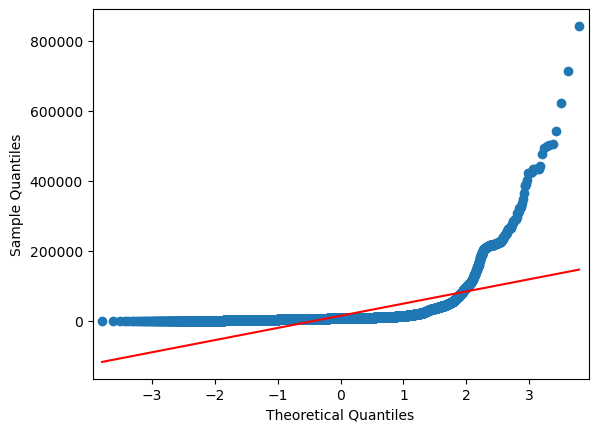

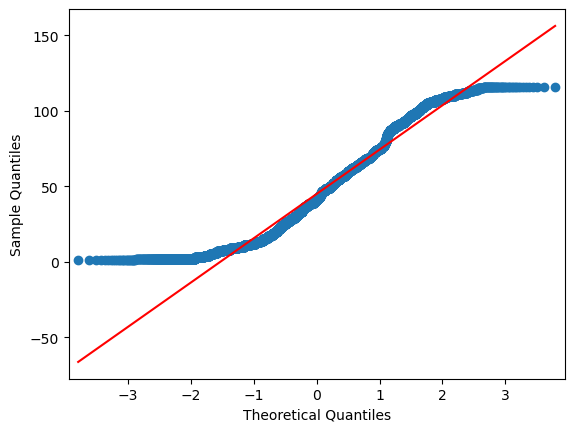

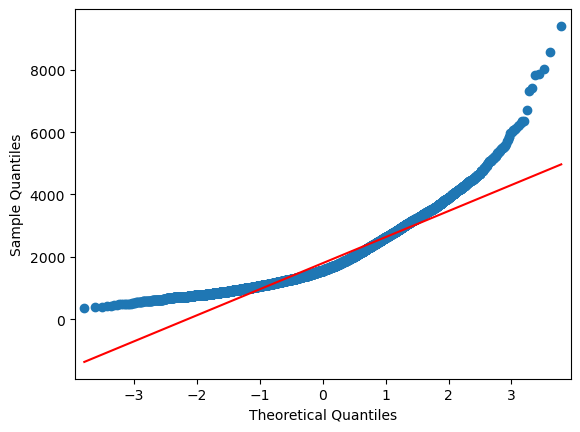

In [38]:
#check for skewness with Q-Q PLot
cont = ['sqft_living', 'sqft_lot', 'yrs_old', 'sqft_above']
x_cont = X_train[cont]
ncols = len(x_cont.columns)

from statsmodels.graphics.gofplots import qqplot
for col in x_cont.columns:
    qqplot(x_cont[col], line='s')

<p style="margin: 10px 0;"></p>

<font msize="3"><b>Log Transformation</b></font>

<font size="3">The visualizations indicated a significant degree of skewness in the data. As a solution, I opted to apply a log transformation in order to alleviate this skewness and improve the data distribution.</font>

In [39]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

log_columns = ['sqft_living', 'sqft_lot', 'yrs_old', 'sqft_above']

# Log transform the X_train column
X_train[log_columns] = np.log(X_train[log_columns] + 1)

# Log transform the X_test column
X_test[log_columns] = np.log(X_test[log_columns] + 1)

# Log transform the y_train column
y_train = np.log(y_train + 1)

# Log transform the y_test  column
y_test = np.log(y_test + 1)

<p style="margin: 10px 0;"></p>

<font msize="3"><b>Re-check for skewness</b></font>

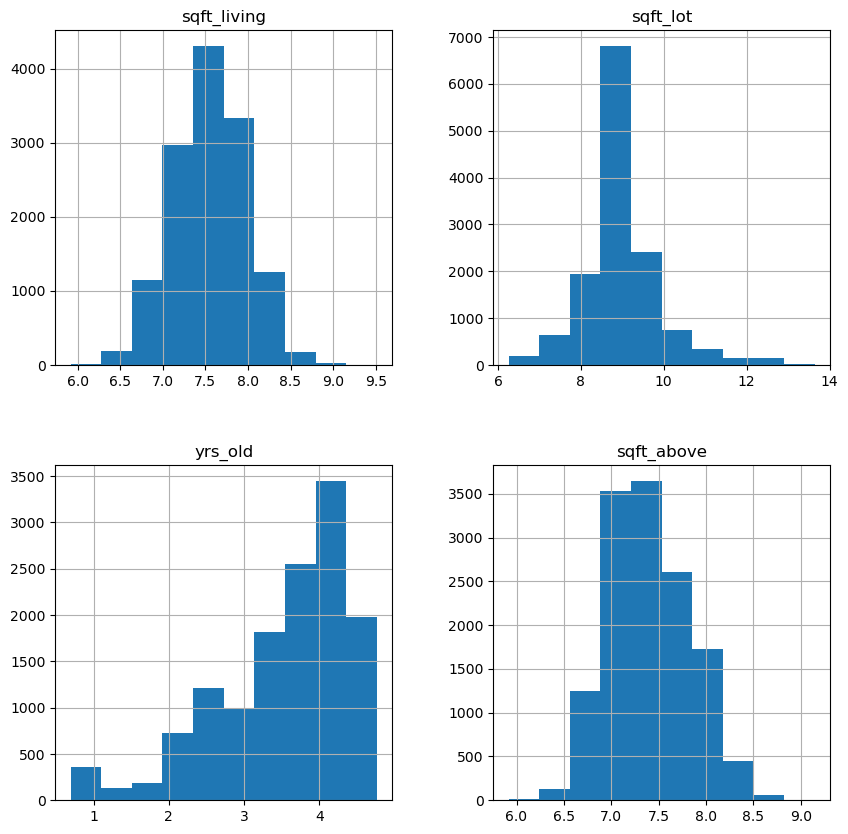

In [40]:
#check for skewness with Hist
X_train[cont].hist(figsize = [10, 10]);

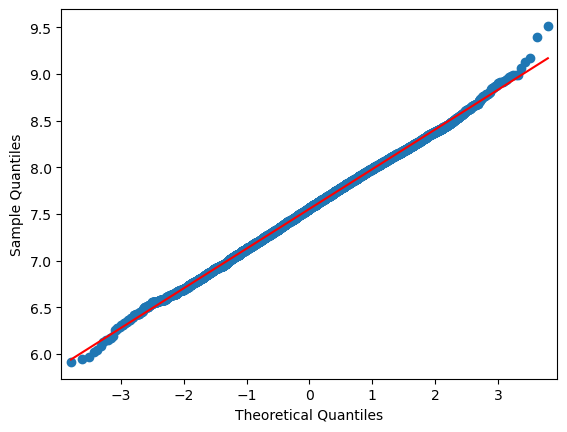

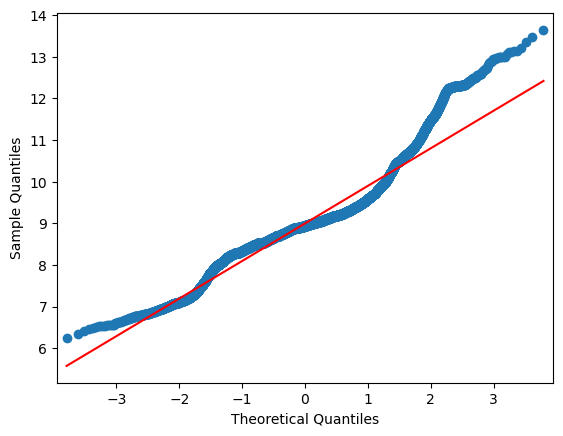

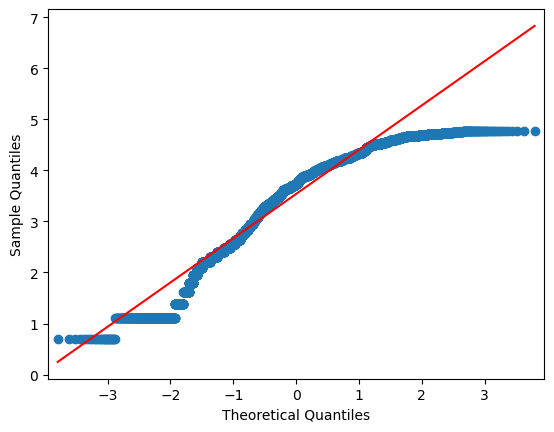

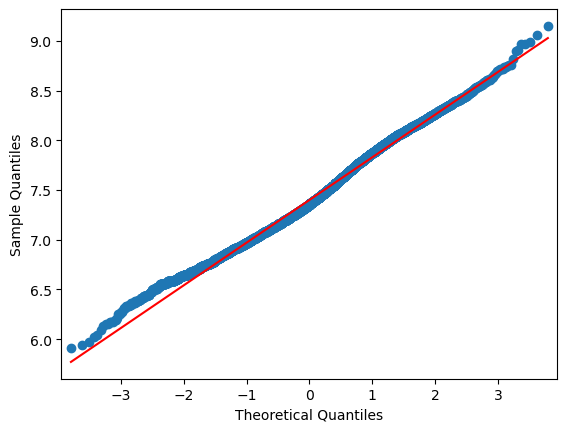

In [41]:
#check for skewness with Q-Q PLot
cont = ['sqft_living', 'sqft_lot', 'yrs_old', 'sqft_above']
x_cont = X_train[cont]
ncols = len(x_cont.columns)

from statsmodels.graphics.gofplots import qqplot
for col in x_cont.columns:
    qqplot(x_cont[col], line='s')

<p style="margin: 10px 0;"></p>

<font msize="3"><b>Check the MSE again</b></font>

<font size="3">The skewness had improves a lot so I checked the MSE error again to make sure there weren't any noticable changes that would affect the model making accurate predictions</font>

In [42]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [43]:
#calculate the MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.13630376632999675
Test Mean Squared Error: 0.13961887507885778


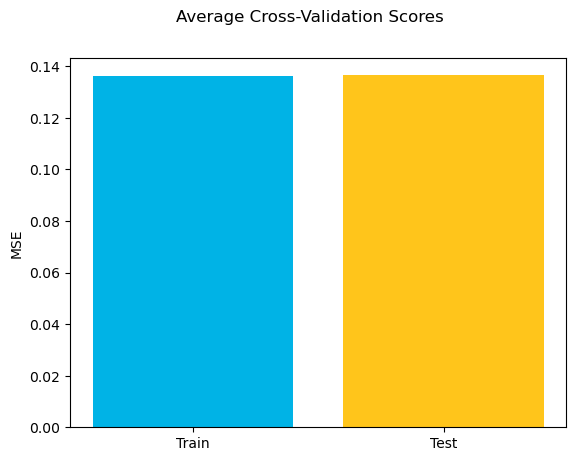

In [44]:
cross_val_results = cross_validate(linreg, X_train, y_train, scoring="neg_mean_squared_error", return_train_score=True)
# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()

colors = ["#00B3E6", "#FFC51B"]
labels = ["Train", "Test"]
fig, ax = plt.subplots()
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("MSE")
fig.suptitle("Average Cross-Validation Scores");

In [45]:
#Cross Validation MSE
print('Cross Validation Test Mean Squared Error:', test_avg)
print('Cross Validation Train Mean Squared Error:', train_avg)

Cross Validation Test Mean Squared Error: 0.1364934206252361
Cross Validation Train Mean Squared Error: 0.1362827077109901


<p style="margin: 10px 0;"></p>

<font msize="3"><b>Check the OLS again</b></font>

<font size="3">Following the implementation of the log transformation, I sought to re-evaluate the Ordinary Least Squares (OLS) results to determine if it had resulted in a more interpretable model and if any noteworthy changes had occurred.</font>

In [46]:
X_train_with_intercept = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     1733.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:42:57   Log-Likelihood:                -5664.9
No. Observations:               13408   AIC:                         1.135e+04
Df Residuals:                   13399   BIC:                         1.142e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.0965      0.082     74.200      0.000       5.935       6.258
sqft_living      0.8222      0.016     50.432      0.000       0.790       0.854
sqft_above       0.1651      0.016     10.208      0.000       0.133       0.197
sqft_lot        -0.0885      0.004    -22.082      0.000      -0.096      -0.081
yrs_old          0.0950      0.004     21.453      0.000       0.086       0.104
4-7_bedrooms    -0.0705      0.008     -8.935      0.000      -0.086      -0.055
7+_bedrooms     -0.2380      0.061     -3.921      0.000      -0.357      -0.119
4+_bathrooms     0.3543      0.025     14.415      0.000       0.306       0.402
waterfront_1     0.6940      0.037     18.612      0.000       0.621       0.767
==============================================================================
Omnibus:                       17.661   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.264
Skew:                          -0.021   Prob(JB):                     0.000485
Kurtosis:                       2.840   Cond. No.                         376.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

.


<font size="7">ITERATION 3</font>

<p style="margin: 10px 0;"></p>

<font msize="3"><b>Introduce more variables</b></font>

<font size="3">An examination of the P-values revealed they were all within acceptable bounds. However, the low adjusted R-squared in my model raises concerns regarding its predictive capability. To enhance its accuracy, I intend to incorporate additional predictors that have a strong correlation with the property price, specifically the 'grade' variable.</font>

In [74]:
#create a new 'grade' variable and perform a log test before joining it onto the data
grade_log = np.log(data_mc['grade'] + 1)

In [49]:
#Join 'grade' onto the X_train and X_test
X_train = pd.concat([X_train, grade_log], axis=1)
X_test = pd.concat([X_test, grade_log], axis=1)
X_train = X_train.dropna()
X_test = X_test.dropna()

<p style="margin: 10px 0;"></p>

<font msize="3"><b>Mean Normalization Transformaion</b></font>

<font size="3">Analysis of the previous Q-Q plot still reveals the presence of outliers that are influencing the model. To mitigate this issue, I intend to utilize a normalization technique. </font>

In [51]:
cont = ['sqft_living', 'sqft_lot', 'yrs_old', 'sqft_above', 'grade']

#create normalization function
def normalize(series):
    return (series - series.mean()) / series.std()

#perform normalization on X-train and X_test variables
X_train[cont] = X_train[cont].apply(normalize)
X_test[cont] = X_test[cont].apply(normalize)
y_train = normalize(y_train)
y_test = normalize(y_test)

<p style="margin: 10px 0;"></p>

<font msize="3"><b>Final check of OLS Regression Results</b></font>

<font size="3">Following the application of mean normalization and introduced variables, it is expected that the results of the Ordinary Least Squares (OLS) analysis will become clearer and more easily interpretable and we will see an increase in the Adj, R-squared value.
</font>

In [54]:
# View OLS Model
X_train_with_intercept = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     2282.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:42:59   Log-Likelihood:                -12794.
No. Observations:               13408   AIC:                         2.561e+04
Df Residuals:                   13398   BIC:                         2.568e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0039      0.008     -0.493      0.622      -0.019       0.012
sqft_living      0.4046      0.013     32.010      0.000       0.380       0.429
sqft_above      -0.0089      0.012     -0.740      0.459      -0.033       0.015
sqft_lot        -0.1256      0.006    -20.348      0.000      -0.138      -0.114
yrs_old          0.2359      0.007     35.312      0.000       0.223       0.249
4-7_bedrooms    -0.0348      0.014     -2.571      0.010      -0.061      -0.008
7+_bedrooms     -0.0295      0.104     -0.285      0.776      -0.233       0.173
4+_bathrooms     0.4793      0.042     11.421      0.000       0.397       0.562
waterfront_1     1.2047      0.063     18.973      0.000       1.080       1.329
grade            0.5108      0.009     57.297      0.000       0.493       0.528
==============================================================================
Omnibus:                       25.980   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.976
Skew:                           0.000   Prob(JB):                     1.14e-07
Kurtosis:                       3.239   Cond. No.                         33.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p style="margin: 10px 0;"></p>

<font msize="3"><b>Drop unwanted predictors</b></font>

<font size="3">With the clarity gained through the interpretable Ordinary Least Squares (OLS) analysis, it has become evident that the '7+_bedrooms' and 'sqft_above' predictors should be dropped due to their high P-values, indicating a lack of statistical significance.</font>

In [55]:
X_train.drop('7+_bedrooms', inplace=True, axis=1)
X_test.drop('7+_bedrooms', inplace=True, axis=1)
X_train.drop('sqft_above', inplace=True, axis=1)
X_test.drop('sqft_above', inplace=True, axis=1)

<p style="margin: 10px 0;"></p>

<font msize="3"><b>Final OLS Check</b></font>

In [56]:
X_train_with_intercept = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     2934.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:43:00   Log-Likelihood:                -12794.
No. Observations:               13408   AIC:                         2.560e+04
Df Residuals:                   13400   BIC:                         2.566e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0040      0.008     -0.517      0.605      -0.019       0.011
sqft_living      0.3984      0.010     40.619      0.000       0.379       0.418
sqft_lot        -0.1265      0.006    -21.005      0.000      -0.138      -0.115
yrs_old          0.2374      0.006     37.477      0.000       0.225       0.250
4-7_bedrooms    -0.0345      0.013     -2.571      0.010      -0.061      -0.008
4+_bathrooms     0.4767      0.041     11.493      0.000       0.395       0.558
waterfront_1     1.2066      0.063     19.019      0.000       1.082       1.331
grade            0.5096      0.009     58.568      0.000       0.493       0.527
==============================================================================
Omnibus:                       25.651   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.522
Skew:                          -0.001   Prob(JB):                     1.43e-07
Kurtosis:                       3.238   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p style="margin: 10px 0;"></p>

<font msize="3"><b>Final MSE Check</b></font>

In [57]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [58]:
#calculate the MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.39479111205319956
Test Mean Squared Error: 0.40677708114208466


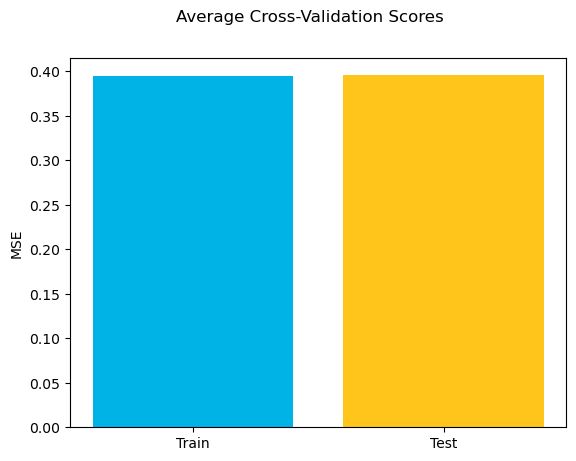

In [59]:
cross_val_results = cross_validate(linreg, X_train, y_train, scoring="neg_mean_squared_error", return_train_score=True)
# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()

colors = ["#00B3E6", "#FFC51B"]
labels = ["Train", "Test"]
fig, ax = plt.subplots()
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("MSE")
fig.suptitle("Average Cross-Validation Scores");

In [60]:
#Cross Validation MSE
print('Cross Validation Test Mean Squared Error:', test_avg)
print('Cross Validation Train Mean Squared Error:', train_avg)

Cross Validation Test Mean Squared Error: 0.39554550768025376
Cross Validation Train Mean Squared Error: 0.39470741163667333


<p style="margin: 10px 0;"></p>

<font msize="3"><b>Conclusion:</b></font>

<font size="3">Based on the results of my modeling efforts, it has been determined that the predictors that exert the most significant impact on the sale price are, in order of importance: waterfront view, grade of the property, number of bathrooms, and living area.</font>

<p style="margin: 10px 0;"></p>

.


<font size="7">Creating A Predictive Model</font>

<font size="3">With the purpose of determining the value of a property, I will create a model to predict its price.</font>

In [63]:
# getting the used column names for the df
used_cols = ['sqft_living', 'sqft_lot', 'yrs_old', '4-7_bedrooms', '4+_bathrooms', 'waterfront_1', 'grade']
used_cols

['sqft_living',
 'sqft_lot',
 'yrs_old',
 '4-7_bedrooms',
 '4+_bathrooms',
 'waterfront_1',
 'grade']

In [75]:
#create new data frame with the property values
new_row = pd.DataFrame(columns=used_cols)
new_row = new_row.append({'sqft_living': 1300,
                          'sqft_lot': 2700,
                          'yrs_old': 15,
                          '4-7_bedrooms': 1,
                          '4+_bathrooms': 0,
                          'waterfront_1': 0,
                          'grade': 8},
                          ignore_index=True)
new_row

C:\Users\warre\AppData\Local\Temp\ipykernel_18560\1105329398.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_row = new_row.append({'sqft_living': 1300,


,sqft_living,sqft_lot,yrs_old,4-7_bedrooms,4+_bathrooms,waterfront_1,grade
0,1300,2700,15,1,0,0,8


In [76]:
#Add grade back into the dataframe
data['grade'] = df['grade']

,price,sqft_living,sqft_lot,floors,waterfront,sqft_above,yrs_old,4-7_bedrooms,7+_bedrooms,4+_bathrooms,grade
1,538000.0,2570,7242.0,2,0,2170,65,0,0,0,7
2,180000.0,770,10000.0,1,0,770,83,0,0,0,6
3,604000.0,1960,5000.0,1,0,1050,51,1,0,0,7
4,510000.0,1680,8080.0,1,0,1680,29,0,0,0,8
5,1230000.0,5420,101930.0,1,0,3890,15,1,0,1,11
...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,1310,1294.0,2,0,1180,8,0,0,0,8
21592,360000.0,1530,1131.0,3,0,1530,7,0,0,0,8
21593,400000.0,2310,5813.0,2,0,2310,2,1,0,0,8
21594,402101.0,1020,1350.0,2,0,1020,7,0,0,0,7


<p style="margin: 10px 0;"></p>

<font size="3">In order to ensure compatibility with my predictive model, it is necessary to log transform and mean normalize the values of the target property.</font>

In [67]:
# first we'll tackle the continuous columns
continuous = ['sqft_living', 'sqft_lot', 'yrs_old', 'grade']

new_row_cont = new_row[continuous]

# log features
log_names = [f'{column}_log' for column in new_row_cont.columns]

new_row_log = np.log(new_row_cont.astype(float)) # won't work unless float
new_row_log.columns = log_names

# normalizing
for col in continuous:
    # normalize using mean and std from overall dataset
    new_row_log[f'{col}_log'] = (new_row_log[f'{col}_log'] - data[col].mean()) / data[col].std()
new_row_log


,sqft_living_log,sqft_lot_log,yrs_old_log,grade_log
0,-2.252526,-0.424856,-1.43808,-4.751596


In [69]:
continuous = ['sqft_living', 'sqft_lot', 'yrs_old', 'grade']
categoricals = ['4-7_bedrooms', '4+_bathrooms', 'waterfront_1']

<p style="margin: 10px 0;"></p>

<font size="3">Now the data has been transformed, I can join it back together</font>

In [71]:
new_row_cat = new_row[categoricals]
new_row_processed = pd.concat([new_row_log, new_row_cat], axis=1)
new_row_processed

,sqft_living_log,sqft_lot_log,yrs_old_log,grade_log,4-7_bedrooms,4+_bathrooms,waterfront_1
0,-2.252526,-0.424856,-1.43808,-4.751596,1,0,0


<p style="margin: 10px 0;"></p>

<font msize="3"><b>Create Predicitive Model</b></font>

<font size="3">Finally, we can create our predicitive model </font>

In [72]:
new_row_pred_log = linreg.predict(new_row_processed)


C:\Users\warre\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- grade_log
- sqft_living_log
- sqft_lot_log
- yrs_old_log
Feature names seen at fit time, yet now missing:
- grade
- sqft_living
- sqft_lot
- yrs_old

  warnings.warn(message, FutureWarning)


array([-0.54822197])

<p style="margin: 10px 0;"></p>

<font msize="3"><b>Scale and exponentiate result</b></font>

<font size="3">Having generated our prediction, it is necessary to apply scaling and exponentiation in order to obtain the actual value.</font>

In [73]:
# prediction needs to be scaled and exponentiated
predicted_price = np.exp(new_row_pred_log) * df["price"].std() + df["price"].mean()

predicted_price = int(predicted_price)
print("The predicted property price is ${:.2f}".format(predicted_price))

The predicted property price is $752626.00


<p style="margin: 10px 0;"></p>

<font msize="3"><b>The predicted property price is $752,626
</b></font>